In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx = 41       # number of spatial grid points
dx = 2/(nx-1) # distance between any pair of grid points
nt = 25       # number of time steps
dt = 0.02     # time step
c = 1         # wave speed
x = np.linspace(0,2,nx)
x

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
        1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
        1.8 ,  1.85,  1.9 ,  1.95,  2.  ])

In [3]:
u = np.ones(nx)             # boundary condition
lbound = np.where(x >= 0.5) # lower boundary
ubound = np.where(x <= 1)   # upper boundary
# bothbound = np.where(x >= 0.5 and x <= 1) # does this accomplish the same thing? No truth value of array ambigous

print(lbound)
print(ubound)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]),)


In [4]:
bounds = np.intersect1d(lbound, ubound)
u[bounds] = 2
print(u)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]


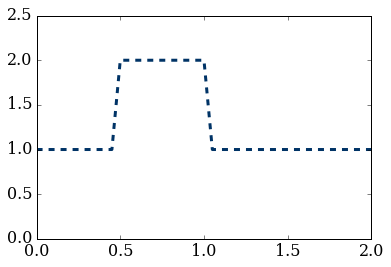

In [5]:
plt.plot(x, u, color='#003366', ls='--', lw=3)
plt.ylim(0,2.5);

This next section is a bit confusing as the text says un is to be initiallized using np.ones() but in the code block its initiallized with u.copy().

In [6]:
for n in range(1,nt):
    un = u.copy()
    for i in range(1,nx):
        u[i] = un[i] - c*dt/dx*(un[i] - un[i-1])

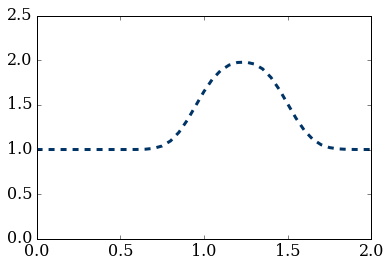

In [7]:
plt.plot(x, u, color='#003366', ls='--', lw=3)
plt.ylim(0,2.5);

### Digging deeper
The shape of the solution is different from the square wave due to errors introduced by the solution method. Lets see if it can be improved by refining the grids. First lets define a function to run all the previous code in one line.

In [8]:
def wave1d(nx):
    #nx = 101      # number of spatial grid points
    dx = 2/(nx-1) # distance between any pair of grid points
    nt = 25       # number of time steps
    dt = 0.02     # time step
    c = 1         # wave speed
    x = np.linspace(0,2,nx)

    u = np.ones(nx)             # boundary condition
    lbound = np.where(x >= 0.5) # lower boundary
    ubound = np.where(x <= 1)   # upper boundary
    bounds = np.intersect1d(lbound, ubound)
    u[bounds] = 2

    for n in range(1,nt):
        un = u.copy()
        for i in range(1,nx):
            u[i] = un[i] - c*dt/dx*(un[i] - un[i-1])

    plt.plot(x, u, color='#003366', ls='--', lw=3)
    plt.title('1d wave for nx = %.0f' % nx)
    plt.ylim(0,2.5);
    return

Yes, it can be improrved by increasing the number of spatial grid points, nx.

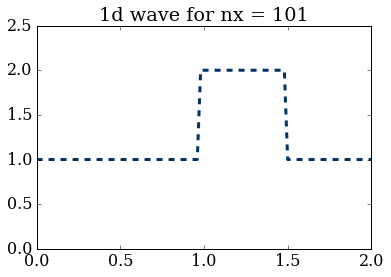

In [9]:
wave1d(101)

Howerver by increasing the spatial grid further we begin to get irregularities near the corners of the wave.

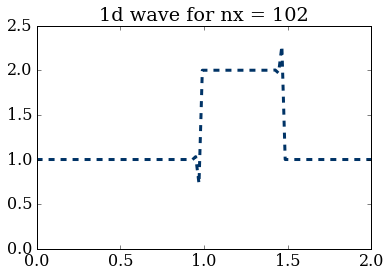

In [10]:
wave1d(102)

This behavior gets worse as the spatial grid is refined further. This instability is interesting to me as it resembles the limits of Fourier series approximation of periodic functions.

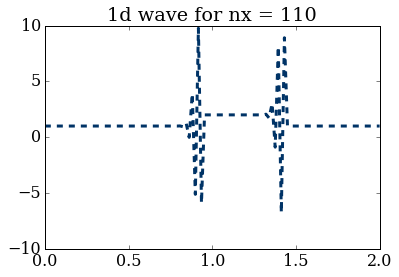

In [11]:
wave1d(110)
plt.ylim([-10,10]);

### Moving on to spatial non-linear convection:

In [12]:
## Problem parameters
nx = 41
dx = 2/(nx-1)
nt = 10
dt = 0.02

# initial conditions
u = np.ones(nx)
u[np.intersect1d(lbound,ubound)]=2

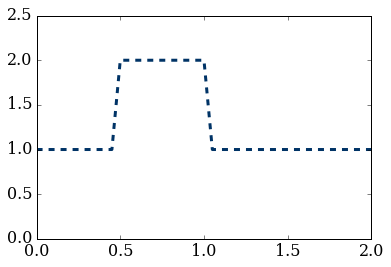

In [13]:
plt.plot(x,u,color='#003366',ls='--',lw=3)
plt.ylim(0,2.5);

In [14]:
for n in range(1,nt):
    un = u.copy()
    u[1:] = un[1:] - un[1:]*dt/dx*(un[1:] - un[0:-1])
    u[0] = 1.0

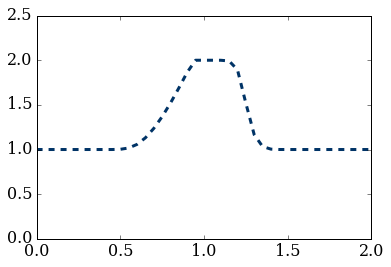

In [16]:
plt.plot(x,u,color='#003366',ls='--',lw=3)
plt.ylim(0,2.5);

making the function so that it wont blow up, since it is non-linear, we have to make sure that sigma depends on the maximum u value.

In [57]:
def wave1d_nonlin(nx):
    u = np.ones(nx)             # boundary condition
    x = np.linspace(0,2,nx)
    lbound = np.where(x >= 0.5) # lower boundary
    ubound = np.where(x <= 1)   # upper boundary
    u[np.intersect1d(lbound,ubound)]=2 # initial condition
    
    #nx = 101       # number of spatial grid points
    dx = 2/(nx-1)   # distance between any pair of grid points
    nt = 20         # number of time steps
    sigma = 0.9     
    dt = sigma*dx/u.max() # time step

    for n in range(1,nt):
        un = u.copy()
        u[1:] = un[1:] - un[1:]*dt/dx*(un[1:] - un[0:-1])
        u[0] = 1.0

    plt.plot(x, u, color='#003366', ls='--', lw=3)
    plt.title('1d wave for nx = %.0f' % nx)
    plt.ylim(0,2.5)
    #plt.xlim(0,nt+10);
    return

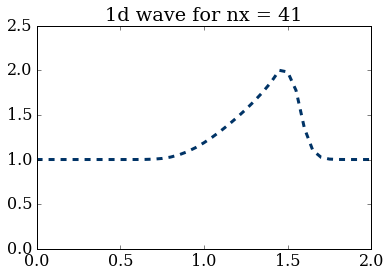

In [58]:
wave1d_nonlin(41)